In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)  # Ignore FutureWarnings

In [2]:
# Packages to be used
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#Loading Student Dropout Data
student_data = pd.read_csv('AcademicDropout_Success_Dataset.csv')

In [4]:
#print first few rows of student dropout dataset
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
print("Number of rows:", student_data.shape[0])
print("Number of columns:", student_data.shape[1])

Number of rows: 4424
Number of columns: 35


In [6]:
# Check for missing values
print(student_data.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mothers qualification                             0
Fathers qualification                             0
Mothers occupation                                0
Fathers occupation                                0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [7]:
# Understanding the types of Data in the Dataframe
print(student_data.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mothers qualification                               int64
Fathers qualification                               int64
Mothers occupation                                  int64
Fathers occupation                                  int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [8]:
print('''About the Data:
The original dataset provides a snapshot of students enrolled in a foreign university’s undergraduate degree program 
in the form of a csv file containing 35 columns and 4,424 rows. Each row represents an in-depth overview of one student in 
their program of choice, various demographic and socioeconomic factors, and their educational outcome.  
By including variables such as unemployment rate, inflation rate, and GDP from their respective regions; the university can 
understand what critical economic data or external factors may also influence the student’s decision-making process.  
Analyzing the data can assist in predicting a student performance level by assessing the units 
credited/enrolled/evaluated/approved, their grade each term, and the success or dropout rate.

Source: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/data''')

About the Data:
The original dataset provides a snapshot of students enrolled in a foreign university’s undergraduate degree program 
in the form of a csv file containing 35 columns and 4,424 rows. Each row represents an in-depth overview of one student in 
their program of choice, various demographic and socioeconomic factors, and their educational outcome.  
By including variables such as unemployment rate, inflation rate, and GDP from their respective regions; the university can 
understand what critical economic data or external factors may also influence the student’s decision-making process.  
Analyzing the data can assist in predicting a student performance level by assessing the units 
credited/enrolled/evaluated/approved, their grade each term, and the success or dropout rate.

Source: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/data


In [9]:
# Change 'Target' data using Label Encoder from sklearn.preprocesing Categorical to Numeric: 0: Dropout, 1: Enrolled, 2: Graduate

label_encoder = LabelEncoder()
student_data['Target']=label_encoder.fit_transform(student_data['Target'])

student_data.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [10]:
print('''Risks in the Data:

- This dataset is taken from one semesters worth of information.  
- Understanding which variables are categorical vs numerical
- The target data has three categories: Dropout, Enrolled, Graduate
- When analyzing variables such as gender, marital status, age of enrollment, international, course of study, etc 
    it is important to consider the make up of the sample in relation to the population. 
- Trend information collected year over year, should be collected from the same source (GDP, unemployment rate, inflation etc)
''')

Risks in the Data:

- This dataset is taken from one semesters worth of information.  
- Understanding which variables are categorical vs numerical
- The target data has three categories: Dropout, Enrolled, Graduate
- When analyzing variables such as gender, marital status, age of enrollment, international, course of study, etc 
    it is important to consider the make up of the sample in relation to the population. 
- Trend information collected year over year, should be collected from the same source (GDP, unemployment rate, inflation etc)



In [11]:
# create a dataframe for the original data
originalstudent_df = pd.DataFrame(student_data)

In [12]:
missing_data = originalstudent_df.isnull().sum()
# Filter out the columns where there are no missing values
missing_data = missing_data[missing_data > 0]
print(missing_data.sort_values(ascending=False))

Series([], dtype: int64)


In [13]:
print('''Methods of Analysis:

Descriptive Statistics: Min/Max, Mean, Median, Mode
Inferential Statistics: Linear Regression, Correlation
Predictive Analysis: Supervised Machine Learning
Presecriptive Analysis: Retention Plan, Recommendations, Optimizations''')

Methods of Analysis:

Descriptive Statistics: Min/Max, Mean, Median, Mode
Inferential Statistics: Linear Regression, Correlation
Predictive Analysis: Supervised Machine Learning
Presecriptive Analysis: Retention Plan, Recommendations, Optimizations


In [14]:
# Descriptive Statistics of the data  
print('Descriptive statistics of the data:')
originalstudent_df.describe()

Descriptive statistics of the data:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [15]:
print('Understanding how many unique features fall under each attribute:')
print(originalstudent_df.nunique())

Understanding how many unique features fall under each attribute:
Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mothers qualification                              29
Fathers qualification                              34
Mothers occupation                                 32
Fathers occupation                                 46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollmen

The dataset is comprised of the following Student Outcomes:


Text(0.5, 1.0, 'Student Status Outcome: Dropout (0), Enrolled (1), Graduate (2)')

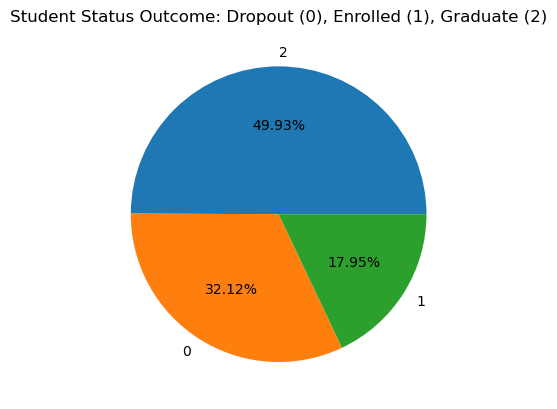

In [16]:
# understanding the distribution of students in the dataset
print('The dataset is comprised of the following Student Outcomes:')
target_count=originalstudent_df['Target'].value_counts()
plt.pie(target_count.values,labels=target_count.index, autopct='%1.2f%%')
plt.title('Student Status Outcome: Dropout (0), Enrolled (1), Graduate (2)')

In [17]:
'By graphing the original dataset this provides a starting point into understanding the data.'

'By graphing the original dataset this provides a starting point into understanding the data.'

In [18]:
# Define a new variable to include all categorical and numerical data in the dataframe
numeric_data = originalstudent_df.select_dtypes(include=['int64','float64'])
correlations = numeric_data.corr()

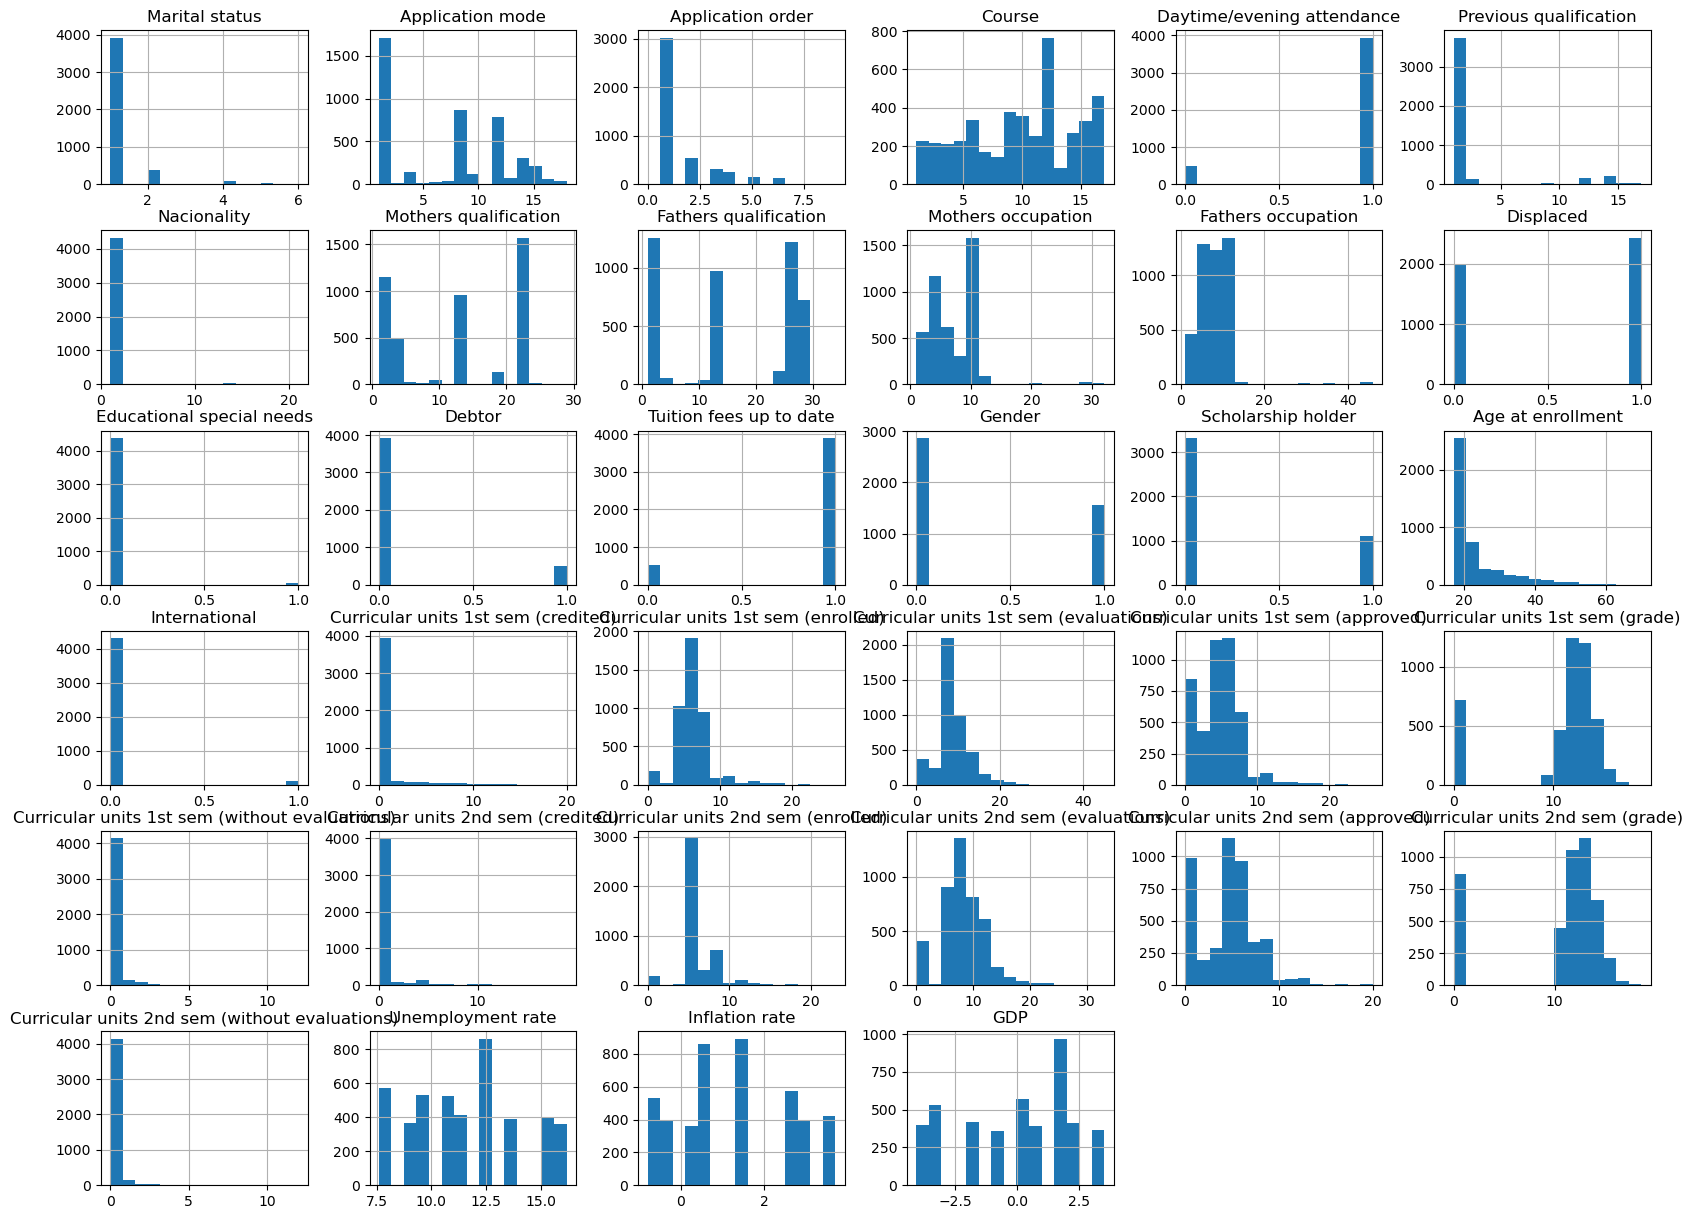

In [19]:
# Histograms for all numeric data
numeric_data.hist(bins=15,figsize=(20, 15))
plt.show()

In [20]:
mask = np.triu(np.ones_like(correlations, dtype=bool))

The below heat map helps to understand which attributes are correlated with a student dropping out or graduating.


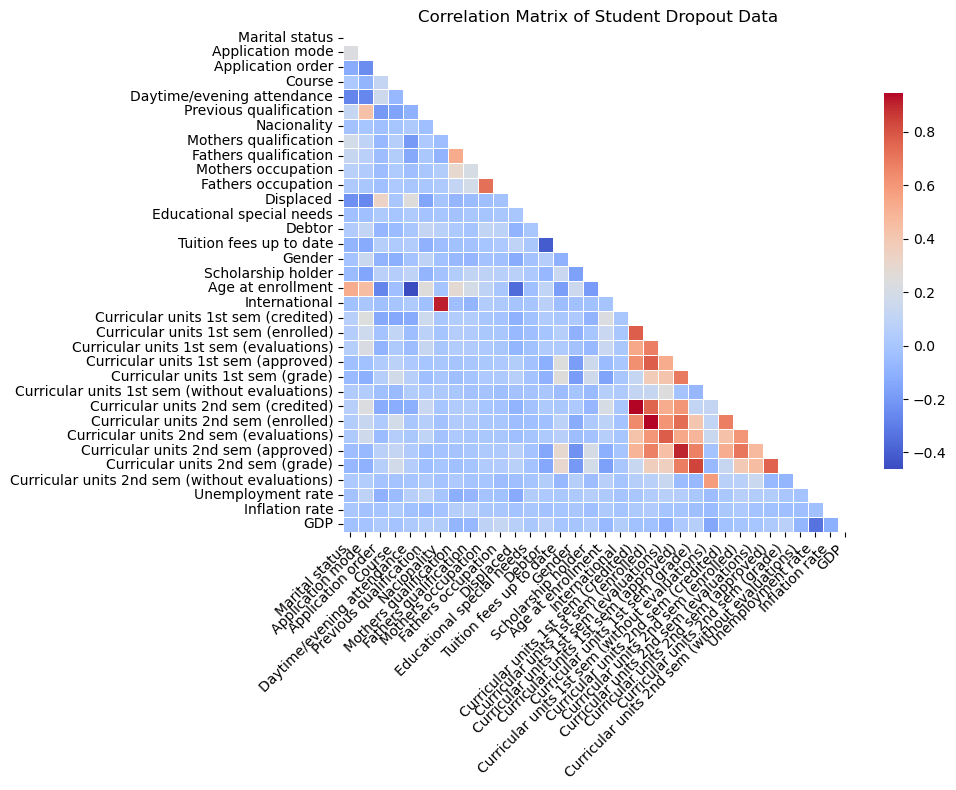

In [21]:
# Create the heatmap
print('The below heat map helps to understand which attributes are correlated with a student dropping out or graduating.')
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, 
            linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix of Student Dropout Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Adjust y-axis labels rotation
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

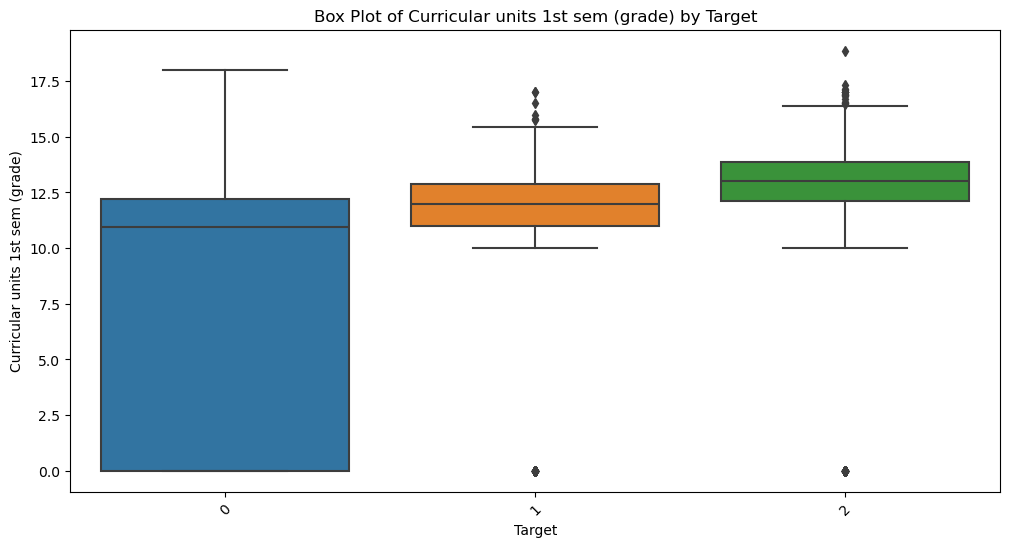

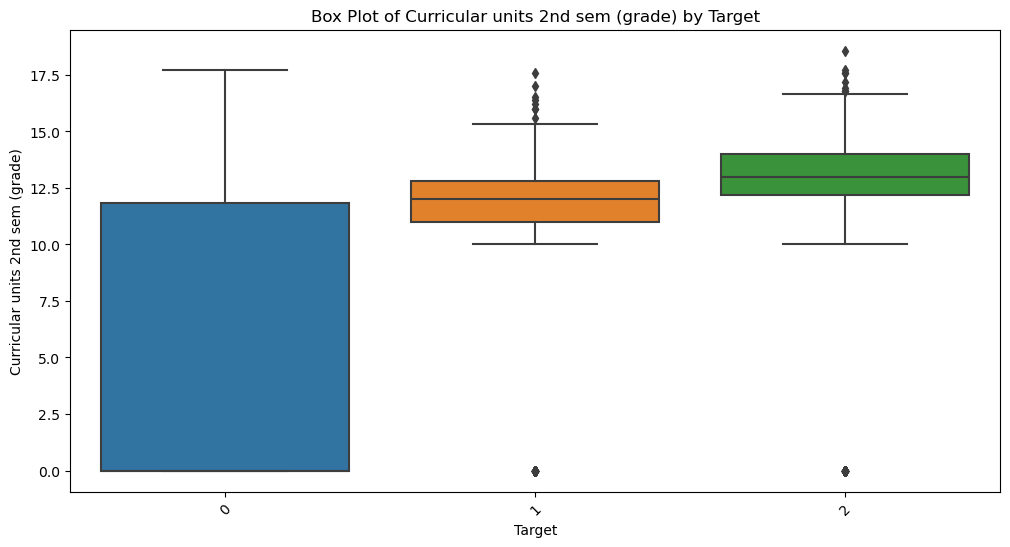

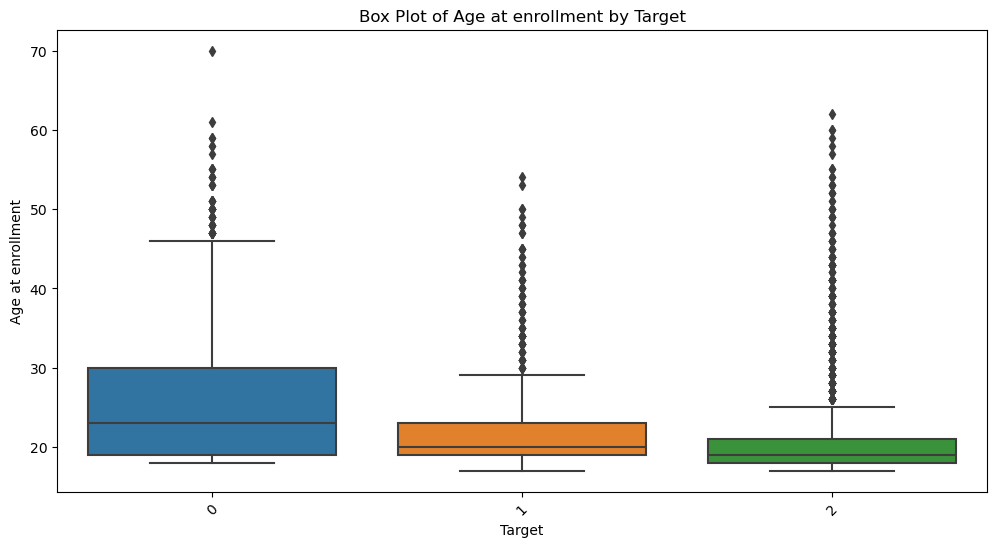

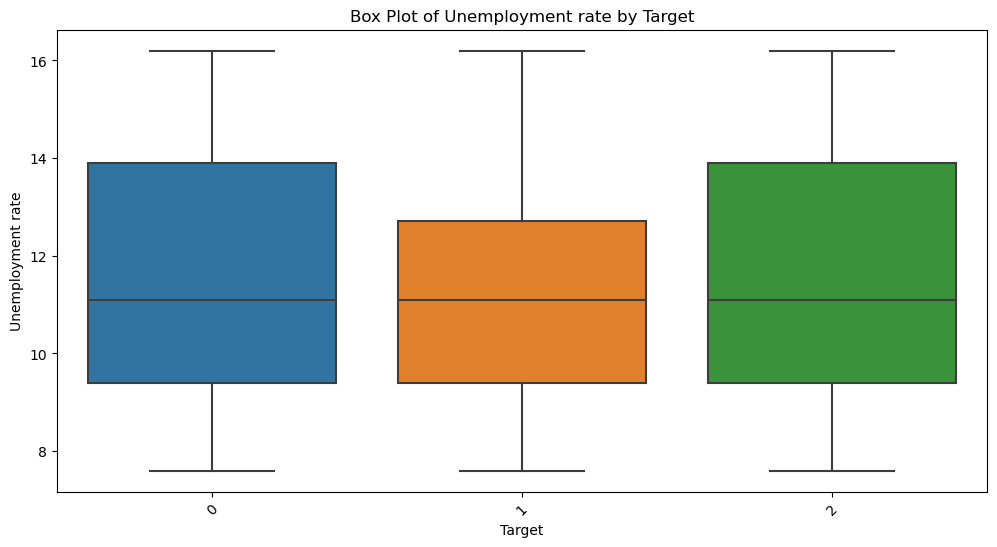

In [22]:
# Example box plot for numeric features by categorical variables
numeric_features = [
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)', 
    'Age at enrollment', 
    'Unemployment rate',
]

categorical_features = [ 'Target']

for cat_feature in categorical_features:
    for num_feature in numeric_features:
        if cat_feature in student_data.columns and num_feature in student_data.columns:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=cat_feature, y=num_feature, data=student_data)
            plt.title(f'Box Plot of {num_feature} by {cat_feature}')
            plt.xlabel(cat_feature)
            plt.ylabel(num_feature)
            plt.xticks(rotation=45)
            plt.show()

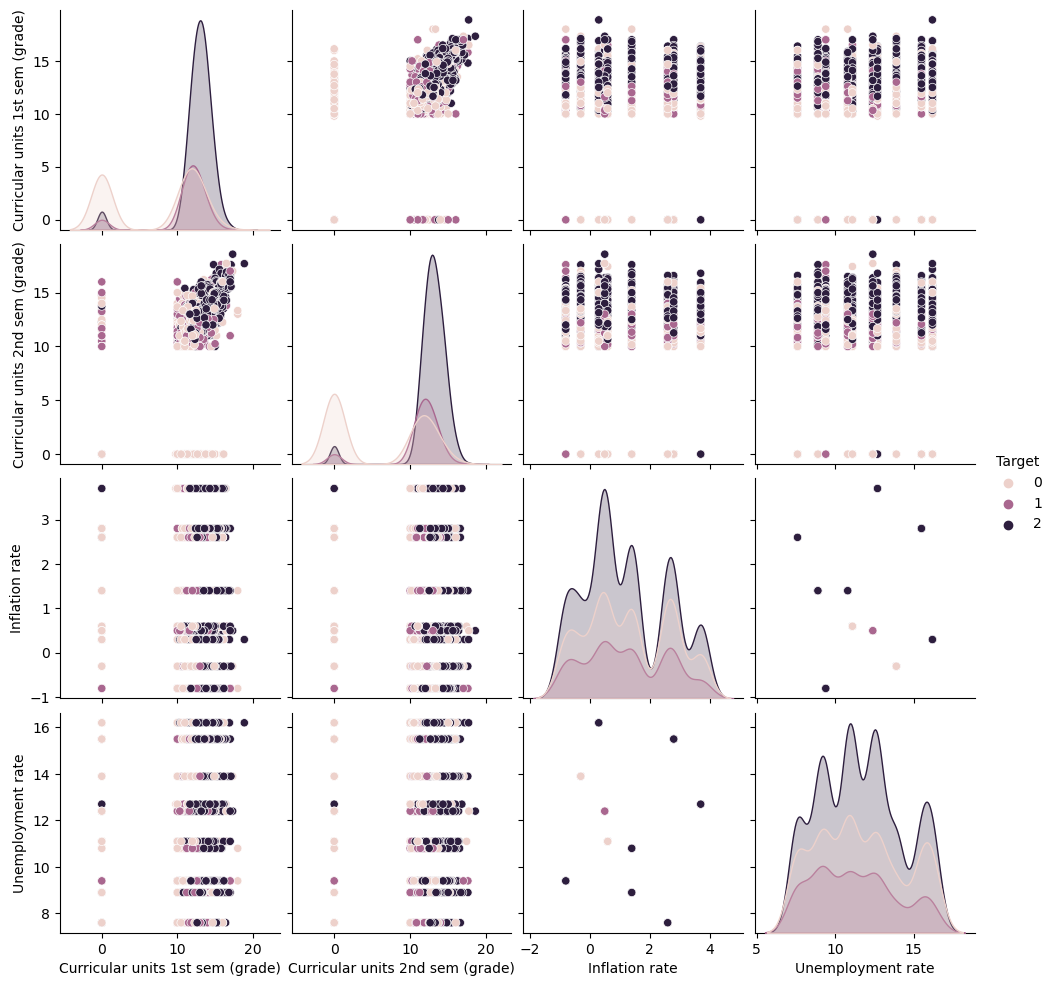

In [23]:
# Pair plot for selected features
selected_features = [
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)', 
    'Inflation rate', 
    'Unemployment rate'
]
sns.pairplot(student_data, vars=selected_features, hue='Target')
plt.show()

In [24]:
print('''Descriptive Statistics: What does descriptive Statistics tell us about the data?

It is important to understand the target distribution of the dataset Dropout (0), Enrolled (1), Graduate (2). The initial 
finding for this semester notes almost 50% of students graduate, 33% drop out and 18% are enrolled. This information is the 
starting point to understanding what contributing factors may play a role in a student decision to drop out, or graduate.  
''')

Descriptive Statistics: What does descriptive Statistics tell us about the data?

It is important to understand the target distribution of the dataset Dropout (0), Enrolled (1), Graduate (2). The initial 
finding for this semester notes almost 50% of students graduate, 33% drop out and 18% are enrolled. This information is the 
starting point to understanding what contributing factors may play a role in a student decision to drop out, or graduate.  



In [25]:
# Cleaning the Data
print('After reviewing the original dataset, we started to clean the data to understand which variables are the most influential and should be the main focus of our study.')

After reviewing the original dataset, we started to clean the data to understand which variables are the most influential and should be the main focus of our study.


In [26]:
# create a copy of the original dataframe for cleaning.  This will make it easier to backtrack if necessary.
cleanstudent_df = originalstudent_df

In [27]:
print(cleanstudent_df.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mothers qualification                               int64
Fathers qualification                               int64
Mothers occupation                                  int64
Fathers occupation                                  int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [28]:
print('''The variables in the dataset can be broken up into the following subgroup factors:

Demographic:
    - Marital status
    - Nacionality
    - Displaced, Gender 
    - Age at enrollment 
    - International

Socio-Economic:
    - Mothers qualification
    - Fathers qualification
    - Mothers occupation
    - Fathers occupation
    - Educational special needs
    - Debtor
    - Tuition fees up to date
    - Scholarship holder

Academic Enrollment:
    - Application mode
    - Application order
    - Course
    - Daytime/evening attendance
    - Previous qualification

Academic Performance:
      - Target
      - Curricular units 1st sem (credited)
      - Curricular units 1st sem (enrolled)
      - Curricular units 1st sem (evaluations)
      - Curricular units 1st sem (approved)
      - Curricular units 1st sem (grade)
      - Curricular units 1st sem (without evaluations)
      - Curricular units 1st sem (credited)
      - Curricular units 2nd sem (enrolled)
      - Curricular units 2nd sem (evaluations)
      - Curricular units 2nd sem (approved)
      - Curricular units 2nd sem (grade)
      - Curricular units 2nd sem (without evaluations)

Economic:
      - Unemployment rate
      - Inflation rate
      - GDP''')

The variables in the dataset can be broken up into the following subgroup factors:

Demographic:
    - Marital status
    - Nacionality
    - Displaced, Gender 
    - Age at enrollment 
    - International

Socio-Economic:
    - Mothers qualification
    - Fathers qualification
    - Mothers occupation
    - Fathers occupation
    - Educational special needs
    - Debtor
    - Tuition fees up to date
    - Scholarship holder

Academic Enrollment:
    - Application mode
    - Application order
    - Course
    - Daytime/evening attendance
    - Previous qualification

Academic Performance:
      - Target
      - Curricular units 1st sem (credited)
      - Curricular units 1st sem (enrolled)
      - Curricular units 1st sem (evaluations)
      - Curricular units 1st sem (approved)
      - Curricular units 1st sem (grade)
      - Curricular units 1st sem (without evaluations)
      - Curricular units 1st sem (credited)
      - Curricular units 2nd sem (enrolled)
      - Curricular units 2

In [29]:
# Subset cleanstudent_data by Attribute Definitions
demographic_df = cleanstudent_df[['Target','Marital status','Nacionality','Displaced','Gender','Age at enrollment','International']]
socio_economic_df = cleanstudent_df[['Target','Mothers qualification', 'Fathers qualification','Mothers occupation','Fathers occupation','Educational special needs','Debtor', 'Tuition fees up to date','Scholarship holder']]
academic_enrollment_df = cleanstudent_df[['Target','Application mode','Application order','Course','Daytime/evening attendance','Previous qualification']]
academic_performance_df = cleanstudent_df[['Target','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 1st sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)']]
economic_df = cleanstudent_df[['Target','Unemployment rate','Inflation rate','GDP']]

In [30]:
#Print new data frames
print('Demographic Factors:',demographic_df)
print('Socio_economic Factors:',socio_economic_df)
print('Academic Enrollment:',academic_enrollment_df)
print('Academic Performance:',academic_performance_df)
print('Economic Factors:',economic_df)

Demographic Factors:       Target  Marital status  Nacionality  Displaced  Gender  \
0          0               1            1          1       1   
1          2               1            1          1       1   
2          0               1            1          1       1   
3          2               1            1          1       0   
4          2               2            1          0       0   
...      ...             ...          ...        ...     ...   
4419       2               1            1          0       1   
4420       0               1           19          1       0   
4421       0               1            1          1       0   
4422       2               1            1          1       0   
4423       2               1            9          1       0   

      Age at enrollment  International  
0                    20              0  
1                    19              0  
2                    19              0  
3                    20              0  
4    

In [31]:
# Create a function to display value counts for each column:
print('A function has been created to display the following attribute value counts for each column in the cleanstudent_df')
def value_counts_sorted(cleanstudent_df):
    for column in cleanstudent_df.columns:
        print (f"'{column}' :")
        print (cleanstudent_df[column].value_counts().sort_index(ascending=True))
        
print(value_counts_sorted(cleanstudent_df))

A function has been created to display the following attribute value counts for each column in the cleanstudent_df
'Marital status' :
Marital status
1    3919
2     379
3       4
4      91
5      25
6       6
Name: count, dtype: int64
'Application mode' :
Application mode
1     1708
2        3
3       16
4      139
5       10
6       30
7       38
8      872
9      124
10       1
11       1
12     785
13      77
14     312
15     213
16      59
17      35
18       1
Name: count, dtype: int64
'Application order' :
Application order
0       1
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
Name: count, dtype: int64
'Course' :
Course
1      12
2     215
3     215
4     210
5     226
6     337
7     170
8     141
9     380
10    355
11    252
12    766
13     86
14    268
15    331
16    192
17    268
Name: count, dtype: int64
'Daytime/evening attendance' :
Daytime/evening attendance
0     483
1    3941
Name: count, dtype: int64
'Previous qualification' :
Previous qua

In [32]:
print('By subsetting the data we separated our Target Column into a new dataframe to include students who dropped out or graduated into cleanstudent_df, and students who are enrolled into enrolledstudent_df.')

By subsetting the data we separated our Target Column into a new dataframe to include students who dropped out or graduated into cleanstudent_df, and students who are enrolled into enrolledstudent_df.


In [33]:
# Subsetting the data to focus on Target Categorical Data 0: Dropout and 2: Graduate.  
cleanstudent_df = cleanstudent_df[cleanstudent_df['Target'].isin([0, 2])]
print(cleanstudent_df)

      Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                        

In [34]:
# Subset data for enrolled students that will be used later 1: Enrolled 
enrolledstudent_df = originalstudent_df[originalstudent_df['Target'].isin([1])]
print(enrolledstudent_df)

      Marital status  Application mode  Application order  Course  \
16                 1                 9                  1      10   
19                 1                 1                  1      16   
21                 1                 9                  4      13   
25                 1                 1                  1      10   
27                 1                 1                  1       6   
...              ...               ...                ...     ...   
4397               1                 3                  4      16   
4402               1                 9                  2      16   
4406               1                 1                  1       5   
4412               1                14                  1       5   
4413               1                14                  1       1   

      Daytime/evening attendance  Previous qualification  Nacionality  \
16                             1                       1            1   
19                       

In [35]:
print("Number of Students in cleanstudent_df:", cleanstudent_df.shape[0])
print("Number of Students in enrolledstudent_df:", enrolledstudent_df.shape[0])

Number of Students in cleanstudent_df: 3630
Number of Students in enrolledstudent_df: 794


In [36]:
# Descriptive statistics on cleanstudent_df:
print('Running the Descriptive Statistics again on our two new dataframes will help to understand the new distribution of our attributes based on the target of dropping out vs graduating.')


Running the Descriptive Statistics again on our two new dataframes will help to understand the new distribution of our attributes based on the target of dropping out vs graduating.


In [37]:
# Descriptive statistics on cleanstudent_df:
print(cleanstudent_df.describe())

       Marital status  Application mode  Application order       Course  \
count     3630.000000       3630.000000        3630.000000  3630.000000   
mean         1.184298          6.810193           1.750138     9.935537   
std          0.613009          5.253618           1.333831     4.340715   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    11.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           6.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 3630.000000             3630.000000  3630.000000   
mean                     0.887603                2.552617     1.242424   
std                      0.315897                3.952440     1.700394   
min                      0.0

The dataset is comprised of the following Student Outcomes:


Text(0.5, 1.0, 'Student Status Outcome: Dropout (0), Enrolled (1), Graduate (2)')

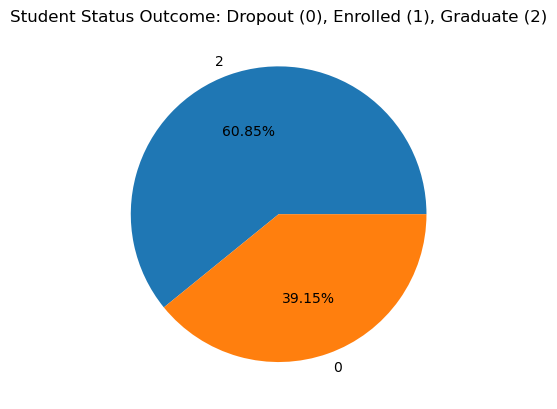

In [38]:
print('The dataset is comprised of the following Student Outcomes:')
target_count2=cleanstudent_df['Target'].value_counts()
plt.pie(target_count2.values,labels=target_count2.index, autopct='%1.2f%%')
plt.title('Student Status Outcome: Dropout (0), Enrolled (1), Graduate (2)')

In [39]:
numeric_data2 = cleanstudent_df.select_dtypes(include=['int32','int64', 'float64'])
correlations2 = numeric_data2.corr()

In [40]:
mask2 = np.triu(np.ones_like(correlations2, dtype=bool))

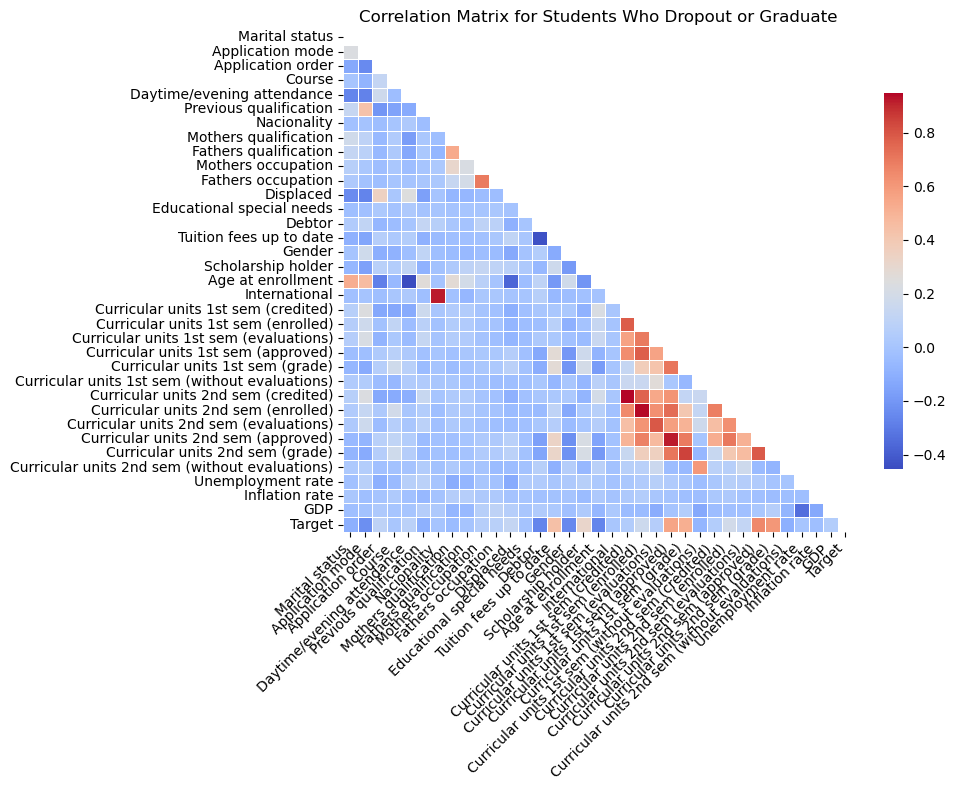

In [41]:
# Create the correlation heatmap for cleanstudent_df
plt.figure(figsize=(10, 8))
sns.heatmap(correlations2, annot=True, fmt=".2f", cmap='coolwarm', mask=mask2, 
            linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix for Students Who Dropout or Graduate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Adjust y-axis labels rotation
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

In [42]:
# Correlation Chart:
print('Looking at the correlation values in relation to the Target arrtibute will help determine if a student will graduate or dropout.  Correlation values close to 1 or -1 have a strong correlation while values close to 0 are weak.')
attribute = 'Target'
correlate_with_target = correlations2[attribute]
print(f"\nCorrelation of '{attribute}' with other attributes:\n",correlate_with_target)

Looking at the correlation values in relation to the Target arrtibute will help determine if a student will graduate or dropout.  Correlation values close to 1 or -1 have a strong correlation while values close to 0 are weak.

Correlation of 'Target' with other attributes:
 Marital status                                   -0.100479
Application mode                                 -0.233888
Application order                                 0.094355
Course                                            0.006814
Daytime/evening attendance                        0.084496
Previous qualification                           -0.102795
Nacionality                                      -0.003823
Mothers qualification                            -0.048459
Fathers qualification                            -0.003850
Mothers occupation                                0.064195
Fathers occupation                                0.073238
Displaced                                         0.126113
Educational speci

In [43]:
print('Focusing on the most correlated attributes (-.2<x<0.2) will remove attributes that are not meaningful and call this new dataframe cleanstudent_subset.')
# Focusing on the most correlated attributes (-.2<x<0.2) will remove attributes that are not meaningful
cleanstudent_subset= cleanstudent_df.drop(columns = ['Marital status','Nacionality','Displaced','International','Mothers qualification', 
                                                     'Fathers qualification','Mothers occupation','Fathers occupation','Educational special needs',
                                                     'Application mode','Application order','Course','Daytime/evening attendance', 'Previous qualification',
                                                    'Curricular units 1st sem (credited)','Curricular units 1st sem (evaluations)',
                                                     'Curricular units 1st sem (without evaluations)','Curricular units 1st sem (enrolled)',
                                                     'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
                                                     'Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (without evaluations)',
                                                     'Unemployment rate','Inflation rate','GDP'],axis=1)
cleanstudent_subset.head(5)

Focusing on the most correlated attributes (-.2<x<0.2) will remove attributes that are not meaningful and call this new dataframe cleanstudent_subset.


,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,0,1,1,0,20,0,0.000000,0,0.000000,0
1,0,0,1,0,19,6,14.000000,6,13.666667,2
2,0,0,1,0,19,0,0.000000,0,0.000000,0
3,0,1,0,0,20,6,13.428571,5,12.400000,2
4,0,1,0,0,45,5,12.333333,6,13.000000,2


The following histograms focus on the distribution of data in the cleanstudent_subset dataframe.


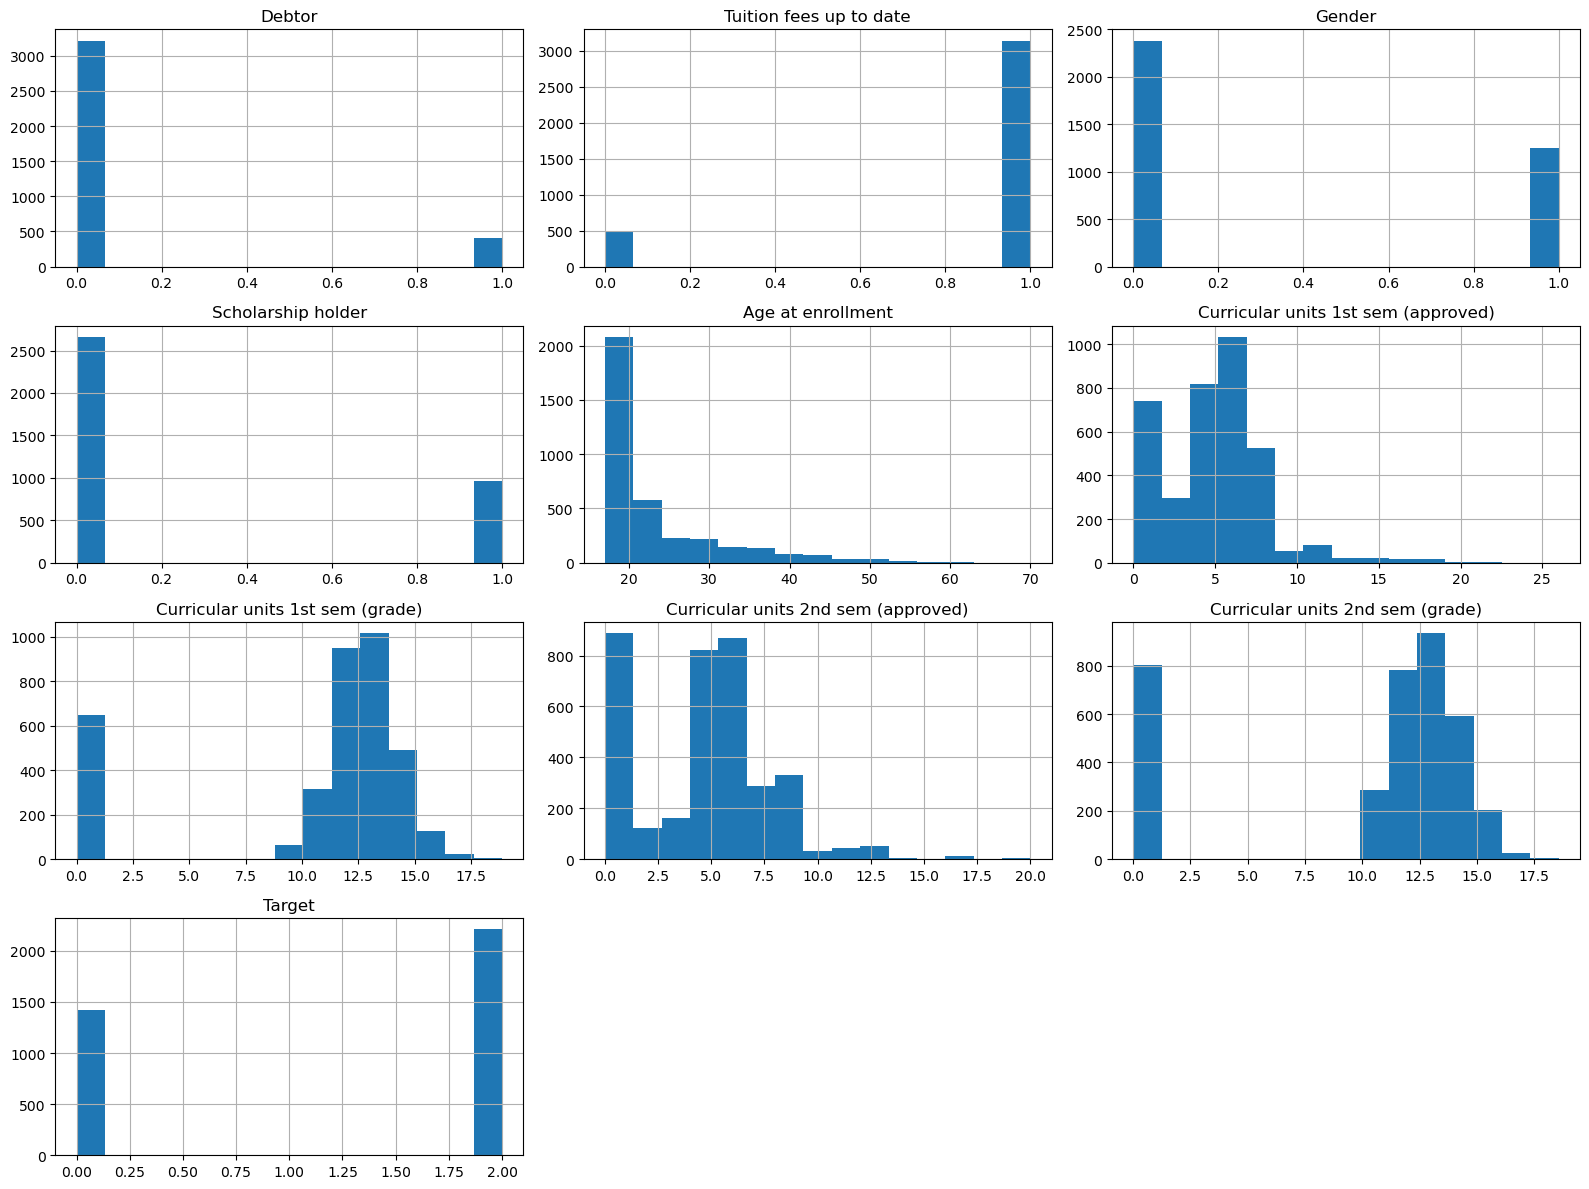

In [44]:
# Histograms for updated dataframe cleanstudent_subset
print('The following histograms focus on the distribution of data in the cleanstudent_subset dataframe.')
cleanstudent_subset.hist(bins=15, figsize=(16, 12))
plt.tight_layout()
plt.show()

In [45]:
# Subset data by Attribute Definitions
demographic_df = cleanstudent_subset[['Target','Gender','Age at enrollment']]
socio_economic_df = cleanstudent_subset[['Target','Debtor', 'Tuition fees up to date','Scholarship holder']]
academic_performance_df = cleanstudent_subset[['Target','Curricular units 1st sem (approved)',
                                               'Curricular units 1st sem (grade)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)']]

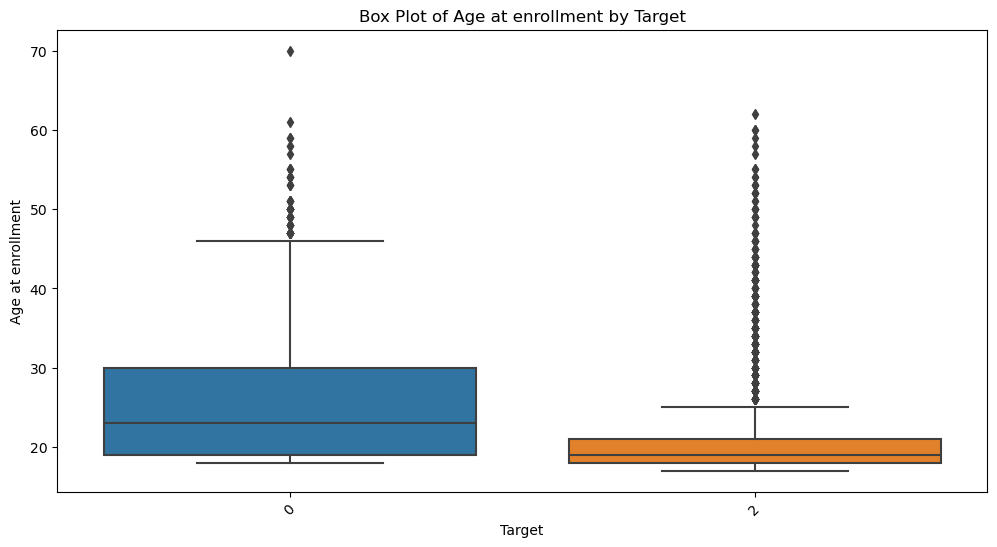

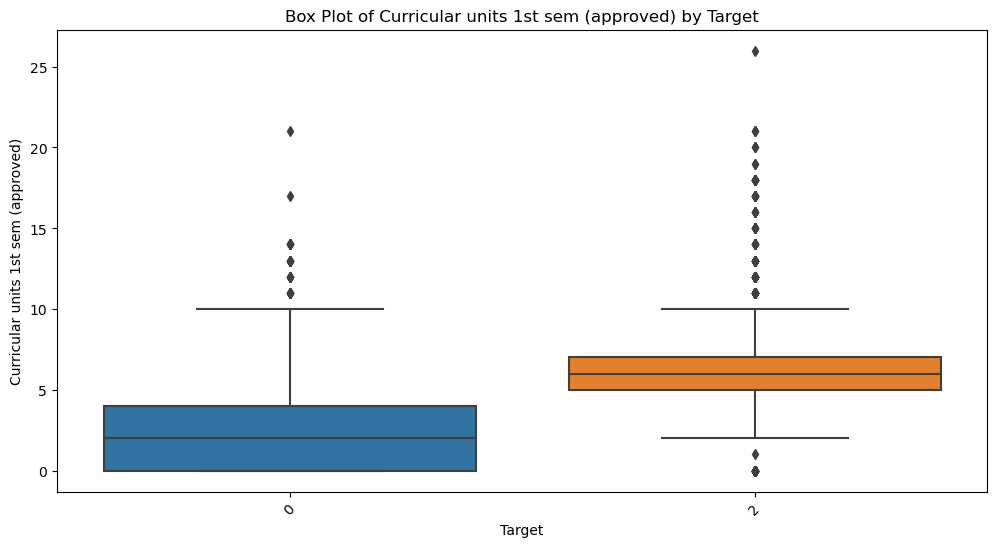

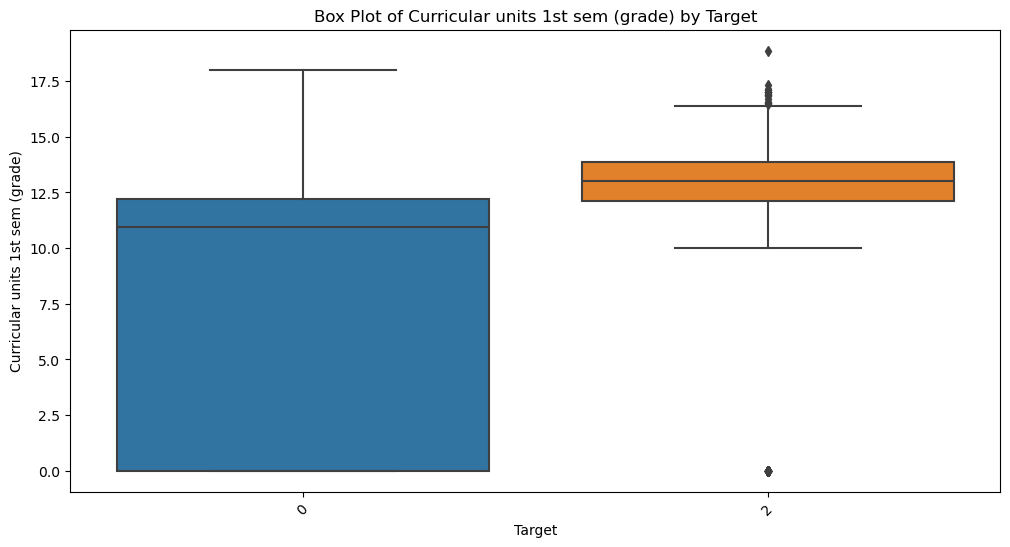

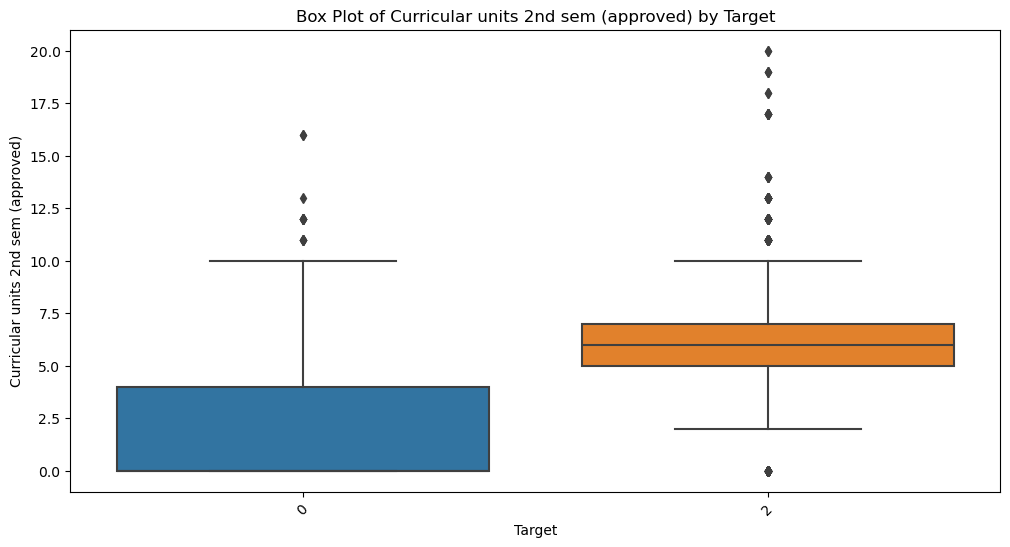

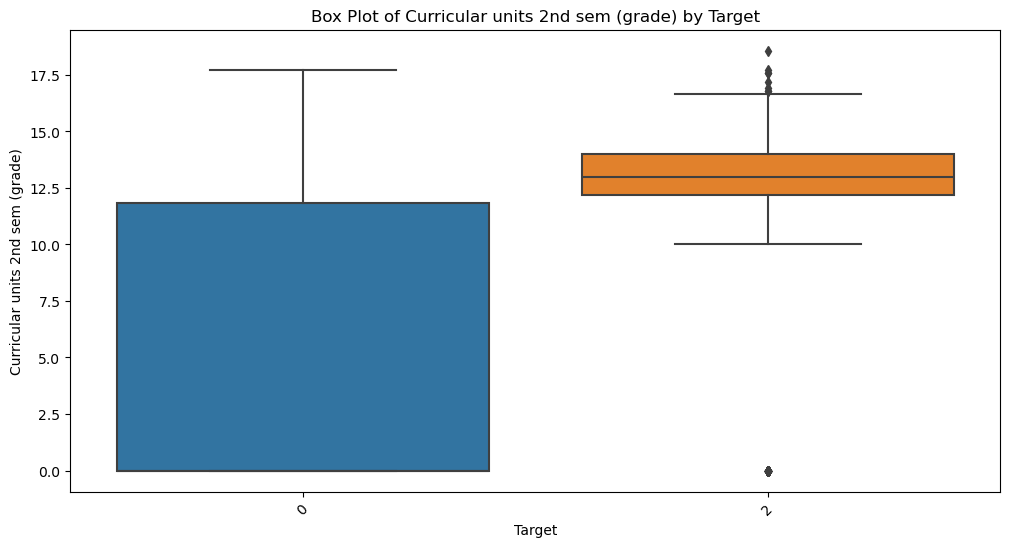

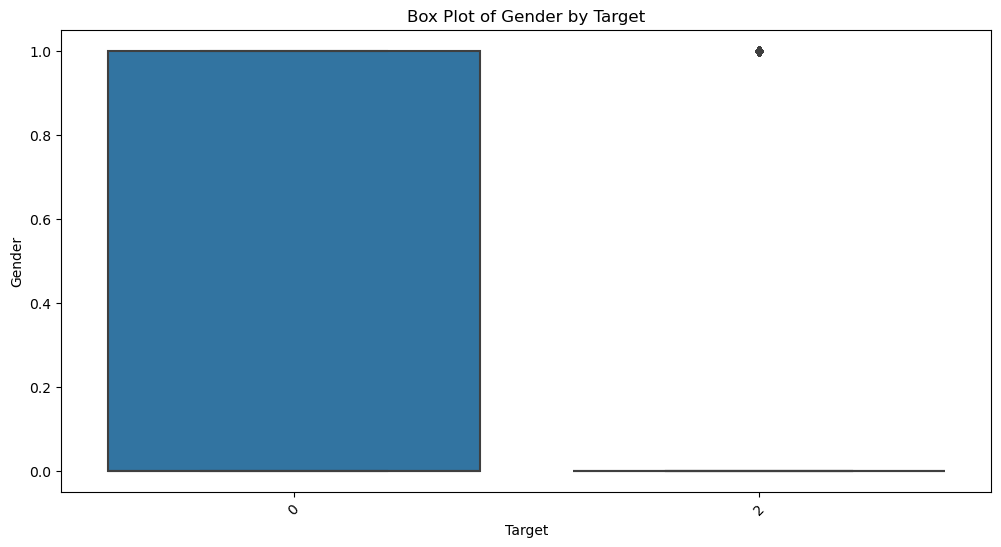

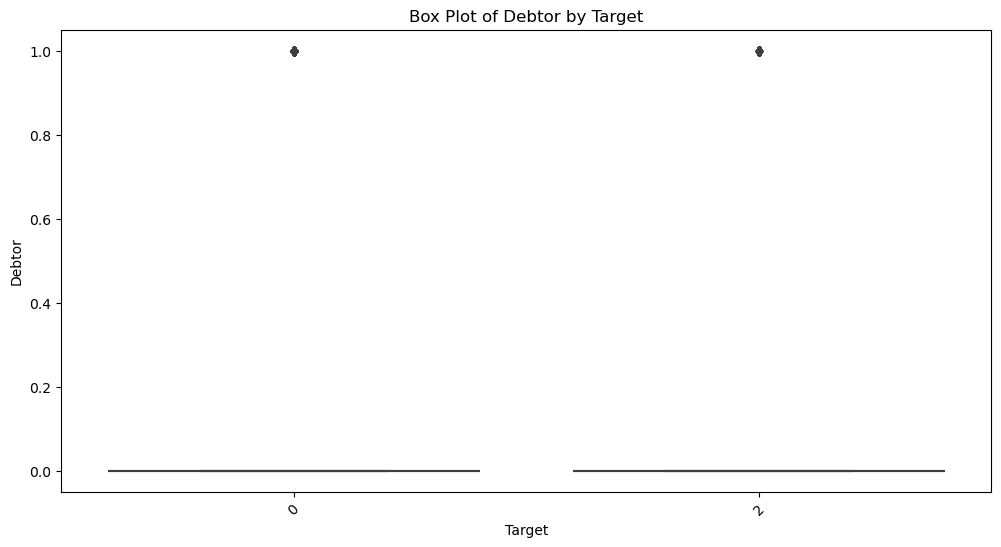

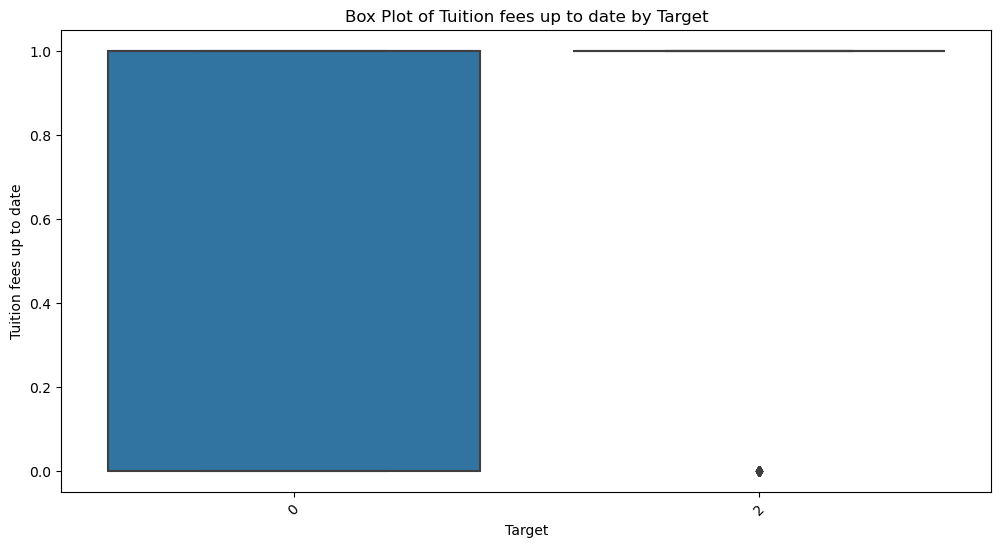

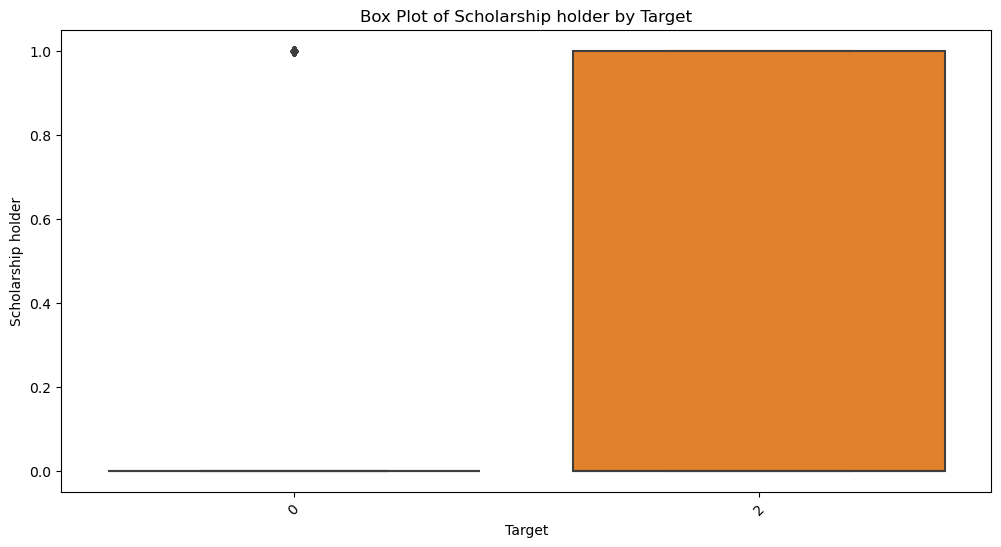

In [46]:
# Examining box plot for the correlated variables against the target variables
numeric_features = [
    'Age at enrollment',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Gender',
    'Debtor',
    'Tuition fees up to date',
    'Scholarship holder'
    
]

categorical_features = ['Target']

for cat_feature in categorical_features:
    for num_feature in numeric_features:
        if cat_feature in cleanstudent_subset.columns and num_feature in cleanstudent_subset.columns:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=cat_feature, y=num_feature, data=cleanstudent_subset)
            plt.title(f'Box Plot of {num_feature} by {cat_feature}')
            plt.xlabel(cat_feature)
            plt.ylabel(num_feature)
            plt.xticks(rotation=45)
            plt.show()

In [47]:
numeric_data3 = cleanstudent_subset.select_dtypes(include=['int32','int64', 'float64'])
correlations3 = numeric_data3.corr()
mask3 = np.triu(np.ones_like(correlations3, dtype=bool))

In [48]:
print('''Low correlation values do not play a significant role in a student’s academic success or drop out so attributes
with values between -0.2 and 0.2 were removed. We found attributes that fall under Academic Enrollment or Economic
Factors did not impact a student’s academic performance. ''')

Low correlation values do not play a significant role in a student’s academic success or drop out so attributes
with values between -0.2 and 0.2 were removed. We found attributes that fall under Academic Enrollment or Economic
Factors did not impact a student’s academic performance. 


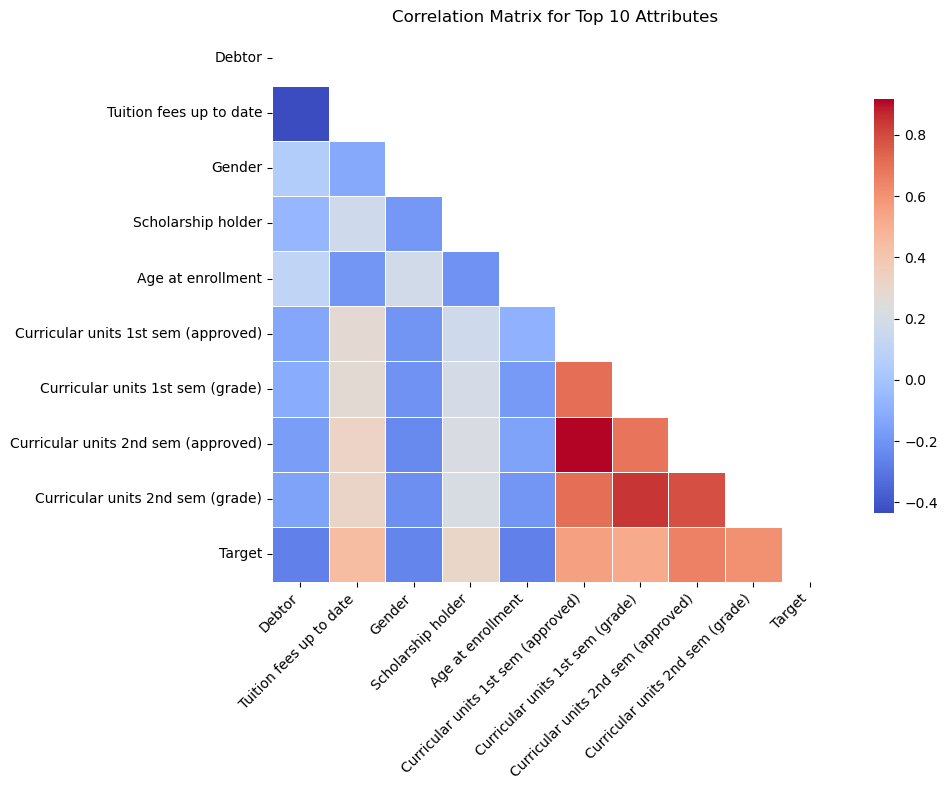

In [49]:
# Create the correlation heatmap for cleanstudent_subset
plt.figure(figsize=(10, 8))
sns.heatmap(correlations3, annot=True, fmt=".2f", cmap='coolwarm', mask=mask3, 
            linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix for Top 10 Attributes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Adjust y-axis labels rotation
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

In [50]:
attribute = 'Target'
correlate_with_target = correlations3[attribute]
print(f"\nCorrelation of '{attribute}' with other attributes:\n",correlate_with_target)


Correlation of 'Target' with other attributes:
 Debtor                                -0.267207
Tuition fees up to date                0.442138
Gender                                -0.251955
Scholarship holder                     0.313018
Age at enrollment                     -0.267229
Curricular units 1st sem (approved)    0.554881
Curricular units 1st sem (grade)       0.519927
Curricular units 2nd sem (approved)    0.653995
Curricular units 2nd sem (grade)       0.605350
Target                                 1.000000
Name: Target, dtype: float64


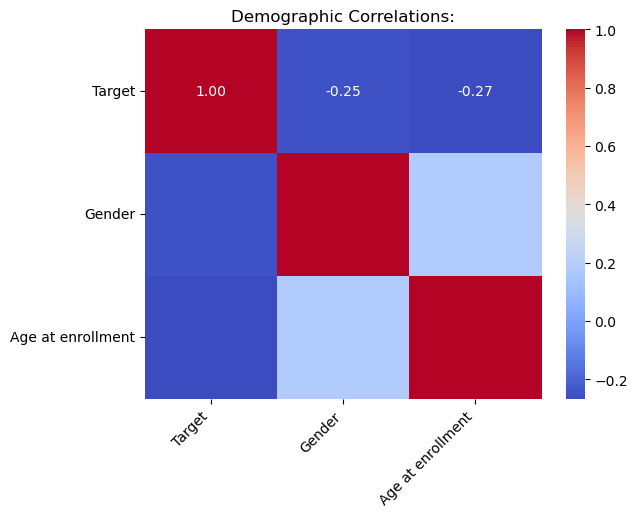

In [51]:
# Correlations by Group
demographic_numeric_data = demographic_df.select_dtypes(include=['int32','int64', 'float64'])
demographic_correlations = demographic_numeric_data.corr()
sns.heatmap(demographic_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Demographic Correlations:')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)   
plt.show()

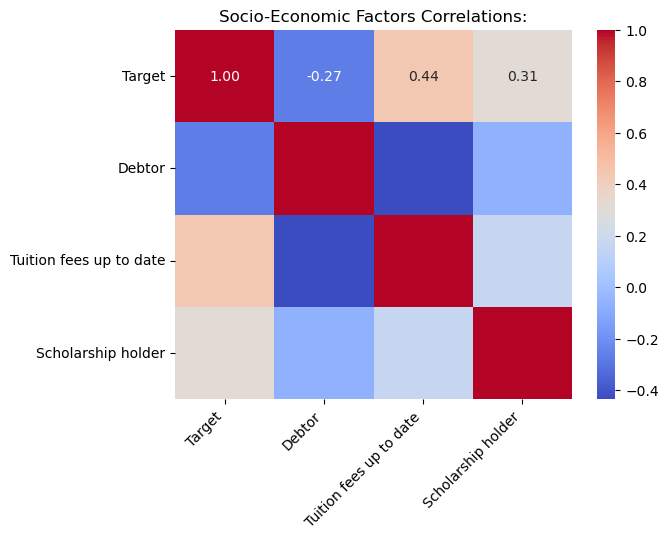

In [52]:
socio_economic_numeric_data = socio_economic_df.select_dtypes(include=['int32','int64', 'float64'])
socio_economic_correlations = socio_economic_numeric_data.corr()
sns.heatmap(socio_economic_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Socio-Economic Factors Correlations:')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0) 
plt.show()

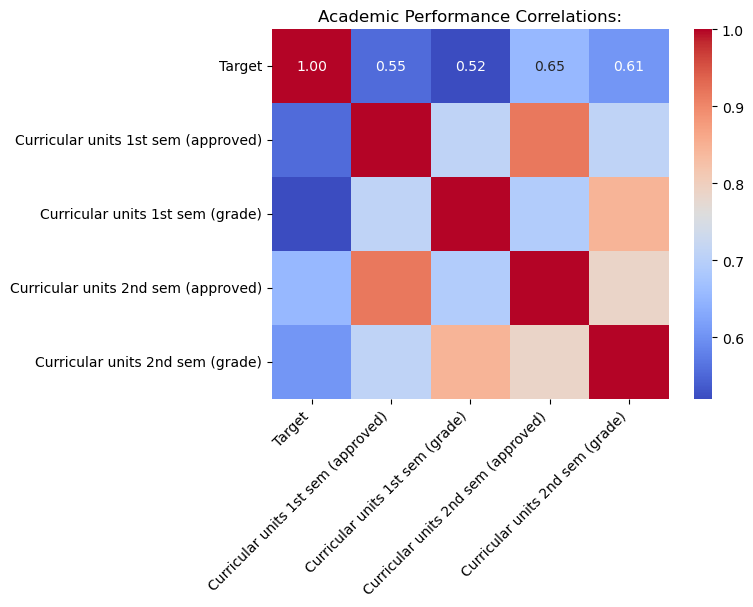

In [53]:
academic_performance_numeric_data = academic_performance_df.select_dtypes(include=['int32','int64', 'float64'])
academic_performance_correlations = academic_performance_numeric_data.corr()
sns.heatmap(academic_performance_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Academic Performance Correlations:')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0) 
plt.show()

In [54]:
print('Focusing on the most correlated attributes (-.2<x<0.2) from will remove attributes that are not meaningful and call this new dataframe enrolledstudent_subset.')
# Focusing on the most correlated attributes (-.2<x<0.2) will remove attributes that are not meaningful
enrolledstudent_subset= enrolledstudent_df.drop(columns = ['Marital status','Nacionality','Displaced','International','Mothers qualification', 
                                                     'Fathers qualification','Mothers occupation','Fathers occupation','Educational special needs',
                                                     'Application mode','Application order','Course','Daytime/evening attendance', 'Previous qualification',
                                                    'Curricular units 1st sem (credited)','Curricular units 1st sem (evaluations)',
                                                     'Curricular units 1st sem (without evaluations)','Curricular units 1st sem (enrolled)',
                                                     'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
                                                     'Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (without evaluations)',
                                                     'Unemployment rate','Inflation rate','GDP'],axis=1)
enrolledstudent_subset.head(5)

Focusing on the most correlated attributes (-.2<x<0.2) from will remove attributes that are not meaningful and call this new dataframe enrolledstudent_subset.


,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
16,0,1,0,0,18,1,12.000000,2,11.000,1
19,0,1,0,0,18,6,11.666667,6,13.500,1
21,0,1,0,0,20,7,11.437500,8,11.425,1
25,1,1,0,1,18,5,11.600000,4,11.000,1
27,0,1,0,0,18,5,12.666667,4,13.000,1


In [55]:
# Using the original dataset to test and train the model. 
print('Using the original data (student_data), we would like to understand if it is possible to predict a student dropping out or graduating through supervised machine learning.') 
    

Using the original data (student_data), we would like to understand if it is possible to predict a student dropping out or graduating through supervised machine learning.


In [56]:
# Reconfirming there are no missing values and drop rows with missing values for simplicity
student_data = student_data.dropna()

In [57]:
# Encode categorical variables and prepare for machine learning
le = LabelEncoder()
for column in student_data.select_dtypes(include=['object']).columns:
    student_data[column] = le.fit_transform(student_data[column])

In [58]:
# Define target and features
target = 'Target'  # Assuming 'Target' is the column to predict
features = student_data.drop(columns=[target]) # Columns used in prediction
labels = student_data[target]

In [59]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [60]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

In [63]:
# Evaluate the model for accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('Above we find that the original data (student_data) is 77% accurrate in predicting students who drop out or graduate based on the 35 variables in the dataset. It is estimated that 352 students will drop out,63 students will be falsely identified as graduating, 19 students will be falsely identified as dropping out and 594 students will graduate.')

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       441
           1       0.60      0.33      0.43       245
           2       0.78      0.93      0.85       642

    accuracy                           0.77      1328
   macro avg       0.73      0.69      0.69      1328
weighted avg       0.76      0.77      0.76      1328

Confusion Matrix:
[[352  26  63]
 [ 62  82 101]
 [ 19  29 594]]
Above we find that the original data (student_data) is 77% accurrate in predicting students who drop out or graduate based on the 35 variables in the dataset. It is estimated that 352 students will drop out,63 students will be falsely identified as graduating, 19 students will be falsely identified as dropping out and 594 students will graduate.


In [64]:
print('Using machine learning we would like to understand the accuracy of predicting student dropout or graduation on the cleanstudent_subset dataframe which focuses on the most correlated (influential) variables.')

Using machine learning we would like to understand the accuracy of predicting student dropout or graduation on the cleanstudent_subset dataframe which focuses on the most correlated (influential) variables.


In [65]:
cleanstudent_subset.shape

(3630, 10)

In [66]:
# Recheck for missing values and drop rows with missing values for simplicity
student_data2 = cleanstudent_subset.dropna()

In [67]:
# Encode categorical variables for machine learning
le = LabelEncoder()
for column in student_data2.select_dtypes(include=['object']).columns:
    student_data2[column] = le.fit_transform(student_data2[column])

In [68]:
# Define target and features
target = 'Target'  # Assuming 'Target' is the column to predict
features = student_data2.drop(columns=[target]) # Columns used for predictions
labels = student_data2[target]

In [69]:
# Split data into training and testing sets (the number 2 will be used to reference the cleanstudent_subset model)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size=0.3, random_state=42)

In [70]:
# Scale features
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [71]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled2, y_train2)

RandomForestClassifier(random_state=42)

In [72]:
# Make predictions
y_pred2 = rf_model.predict(X_test_scaled2)

In [73]:
# Evaluate model
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test2, y_pred2))
print("Confusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))
print('When training and testing the model on cleanstudent_subset we find the model to be 88% accurrate in predicting students who drop out or graduate using the top 8 correlted variables. From the test data, it is estimated that 332 students will drop out,82 students will be falsely identified as graduating, 44 students will be falsely identified as dropping out and 631 students will graduate. As a result, by focusing on these factors for incoming cohorts, the university can help boost their graduation rates in the future.')

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       414
           2       0.88      0.93      0.91       675

    accuracy                           0.88      1089
   macro avg       0.88      0.87      0.87      1089
weighted avg       0.88      0.88      0.88      1089

Confusion Matrix:
[[332  82]
 [ 44 631]]
When training and testing the model on cleanstudent_subset we find the model to be 88% accurrate in predicting students who drop out or graduate using the top 8 correlted variables. From the test data, it is estimated that 332 students will drop out,82 students will be falsely identified as graduating, 44 students will be falsely identified as dropping out and 631 students will graduate. As a result, by focusing on these factors for incoming cohorts, the university can help boost their graduation rates in the future.


In [74]:
print('Using the training model from cleanstudent_subset we can apply these learnings to test the number of students who are currently enrolled in the university, to understand the chance of a student dropping out or graduating in the future.  We will use the subset enrolledstudent_subset to explore this further. ')

Using the training model from cleanstudent_subset we can apply these learnings to test the number of students who are currently enrolled in the university, to understand the chance of a student dropping out or graduating in the future.  We will use the subset enrolledstudent_subset to explore this further. 


In [75]:
# Step 1: Extract features and target from the training data cleanstudent_subset
X_train = cleanstudent_subset.drop(columns=['Target'])
y_train = cleanstudent_subset['Target']

In [76]:
# Train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
# Predict on new data (enrolledstudent_subset)
X_new_enrolledstudent = enrolledstudent_subset[X_train.columns]  # Ensure the new data has the same columns
predictions = rf_model.predict(X_new_enrolledstudent) 

In [78]:
# Display predictions
print(X_new_enrolledstudent)

      Debtor  Tuition fees up to date  Gender  Scholarship holder  \
16         0                        1       0                   0   
19         0                        1       0                   0   
21         0                        1       0                   0   
25         1                        1       0                   1   
27         0                        1       0                   0   
...      ...                      ...     ...                 ...   
4397       0                        1       0                   0   
4402       0                        1       1                   0   
4406       0                        1       1                   0   
4412       0                        1       1                   1   
4413       0                        1       1                   0   

      Age at enrollment  Curricular units 1st sem (approved)  \
16                   18                                    1   
19                   18                    

In [79]:
# Example to predict on new data (enrolledstudent_subset)
X_test = enrolledstudent_subset[X_train.columns]  # Ensure it has the same features
y_true = enrolledstudent_subset['Target']         # Actual labels of enrolledstudent_subset

In [80]:
# Predictions
y_pred = rf_model.predict(X_test)

In [81]:
# Generate confusion matrix
confusion_mtrx = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mtrx, display_labels=rf_model.classes_)


In [82]:
print('Confusion Matrix:',confusion_mtrx)
print('Using the enrolledstudent_subset that is comprised of students who are enrolled in the university, we can predict 362 students may dropout and 432 may graduate.')

Confusion Matrix: [[  0   0   0]
 [362   0 432]
 [  0   0   0]]
Using the enrolledstudent_subset that is comprised of students who are enrolled in the university, we can predict 362 students may dropout and 432 may graduate.


In [83]:
# Linear Regression on originalstudent_df

In [84]:
student_data_lr = originalstudent_df

In [85]:
x = student_data_lr.drop('Target', axis=1)
y = student_data_lr['Target']

In [86]:
x.shape

(4424, 34)

In [87]:
y.shape

(4424,)

In [88]:
from sklearn.model_selection import train_test_split
#split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.5)

In [89]:
print("Training Set Shape: " , X_train.shape,y_train.shape)
print("Testing Set Shape: " , X_test.shape,y_test.shape)


Training Set Shape:  (2212, 34) (2212,)
Testing Set Shape:  (2212, 34) (2212,)


In [90]:
lr =LinearRegression()

In [91]:
# Train the model on the training set

lr.fit(X_train,y_train)

LinearRegression()

In [92]:
# predict on the testing set
# Y predicted value is the predicted target values based on the features(these are all the columns) in the dataset.
# Once we have these preds we can compare them to the actual values of the target
y_pred = lr.predict(X_test)

In [93]:
y_pred.shape

(2212,)

In [94]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error,r2_score

#Evaluate the performance of the model
r2= r2_score(y_test,y_pred)

mse=mean_squared_error(y_test, y_pred)

mae=mean_absolute_error(y_test, y_pred)

intercept= lr.intercept_

print("R2 score: ", r2) # variance of the dependent variable (target) is explained by the independent variables(features)
                        # How well the model fits the data. Higher the better
                        
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Intercept: ", intercept)

R2 score:  0.6005686638289144
Mean Squared Error:  0.3158683320201826
Mean Absolute Error:  0.4254568353016905
Intercept:  0.9489443571038791


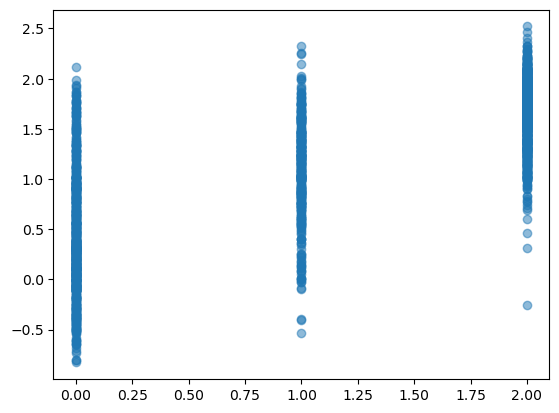

In [95]:
plt.scatter(y_test, y_pred, alpha=0.5)

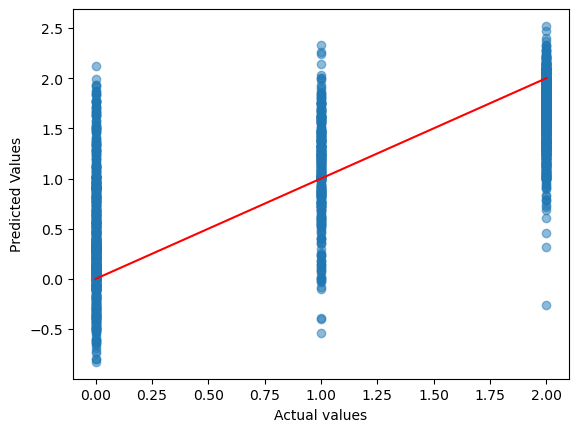

In [96]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.show()

In [97]:
print('''Linear Regerssion Model: OriginalStudent 
The first linear regression model looked at all the variables present and based on training and a test set of the dataset it was able to predict how much of the change in the variables selected can be explained in the y variable being measured which in this case would be the target value which signifies the enrollment status of the student and whether they dropped out of the university or not.

The model obtained an R-squared score of 0.59. This means that 59% of the change in student dropout status is explained by these variables.

Variables: All variables in the dataset.
''')

Linear Regerssion Model: OriginalStudent 
The first linear regression model looked at all the variables present and based on training and a test set of the dataset it was able to predict how much of the change in the variables selected can be explained in the y variable being measured which in this case would be the target value which signifies the enrollment status of the student and whether they dropped out of the university or not.

The model obtained an R-squared score of 0.59. This means that 59% of the change in student dropout status is explained by these variables.

Variables: All variables in the dataset.



In [98]:
#Linear Regression Model: Cleanstudent Subset
student_data_lr5 = cleanstudent_df  #cleanstudent_subset

In [99]:
x5 = student_data_lr5.drop('Target', axis=1)
y5 = student_data_lr5['Target']

In [100]:
from sklearn.model_selection import train_test_split
#split the data into training and testing

X5_train, X5_test, y5_train, y5_test = train_test_split(x5,y5, test_size=0.3)

In [101]:
print("Training Set Shape: " , X5_train.shape,y5_train.shape)
print("Testing Set Shape: " , X5_test.shape,y5_test.shape)

Training Set Shape:  (2541, 34) (2541,)
Testing Set Shape:  (1089, 34) (1089,)


In [102]:
lr5 =LinearRegression()

In [103]:
#Train the model on the training set

lr5.fit(X5_train,y5_train)

LinearRegression()

In [104]:
#predict on the testing set
#Y predicted value is the predicted target values based on the features(these are all the columns in the dataset.
#Once we have these preds we can compare them to the actual values of the target
y5_pred = lr5.predict(X5_test)

In [105]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error,r2_score

#Evaluate the performance of the model
r2_5= r2_score(y5_test,y5_pred)

mse_5=mean_squared_error(y5_test, y5_pred)

mae_5=mean_absolute_error(y5_test, y5_pred)

intercept_5= lr5.intercept_

print("R5 score: ", r2_5) # variance of the dependent variable (target) is explained by the independent variables(features)
                        # How well the model fits the data. Higher the better
                        #If the model is a 
print("Mean Squared Error: ", mse_5)
print("Mean Absolute Error: ", mae_5)
print("Intercept: ", intercept_5)

R5 score:  0.6673167679527711
Mean Squared Error:  0.3114683539705512
Mean Absolute Error:  0.41011677360653553
Intercept:  0.9923367731631271


In [106]:
print('''Linear Regerssion Model: Cleanstudent Subset
The model obtained an R-squared score of 0.65. This means that 65% of the change in student dropout status is explained by these variables.

Variables: Target, Debtor, Tuition fees up to date, scholarship holder, curricular units first semester(approved), curricular units second semester(approved), curricular units first semester(grade), curricular units second semester(grade),gender, age of enrollment.
''')

Linear Regerssion Model: Cleanstudent Subset
The model obtained an R-squared score of 0.65. This means that 65% of the change in student dropout status is explained by these variables.

Variables: Target, Debtor, Tuition fees up to date, scholarship holder, curricular units first semester(approved), curricular units second semester(approved), curricular units first semester(grade), curricular units second semester(grade),gender, age of enrollment.



In [107]:
#Linear Regression Model 2
student_data_lr2 = socio_economic_df  #cleanstudent_subset

In [108]:
socio_economic_df#cleanstudent_subset

,Target,Debtor,Tuition fees up to date,Scholarship holder
0,0,0,1,0
1,2,0,0,0
2,0,0,0,0
3,2,0,1,0
4,2,0,1,0
...,...,...,...,...
4419,2,0,1,0
4420,0,1,0,0
4421,0,0,1,1
4422,2,0,1,1


In [109]:
x2 = student_data_lr2.drop('Target', axis=1)
y2 = student_data_lr2['Target']

In [110]:
from sklearn.model_selection import train_test_split
#split the data into training and testing

X2_train, X2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.3)

In [111]:
x2.shape

(3630, 3)

In [112]:
y2.shape

(3630,)

In [113]:
print("Training Set Shape: " , X2_train.shape,y2_train.shape)
print("Testing Set Shape: " , X2_test.shape,y2_test.shape)

Training Set Shape:  (2541, 3) (2541,)
Testing Set Shape:  (1089, 3) (1089,)


In [114]:
lr2 =LinearRegression()

In [115]:
#Train the model on the training set

lr2.fit(X2_train,y2_train)

LinearRegression()

In [116]:
#predict on the testing set
#Y predicted value is the predicted target values based on the features(these are all the columns in the dataset.
#Once we have these preds we can compare them to the actual values of the target
y2_pred = lr2.predict(X2_test)

In [117]:
y2_pred.shape

(1089,)

In [118]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error,r2_score

#Evaluate the performance of the model
r2_2= r2_score(y2_test,y2_pred)

mse_2=mean_squared_error(y2_test, y2_pred)

mae_2=mean_absolute_error(y2_test, y2_pred)

intercept_2= lr2.intercept_

print("R2 score: ", r2_2) # variance of the dependent variable (target) is explained by the independent variables(features)
                        # How well the model fits the data. Higher the better
                        #If the model is a 
print("Mean Squared Error: ", mse_2)
print("Mean Absolute Error: ", mae_2)
print("Intercept: ", intercept_2)

R2 score:  0.24909378065787613
Mean Squared Error:  0.7147381152651731
Mean Absolute Error:  0.715682677472177
Intercept:  0.20970265575675273


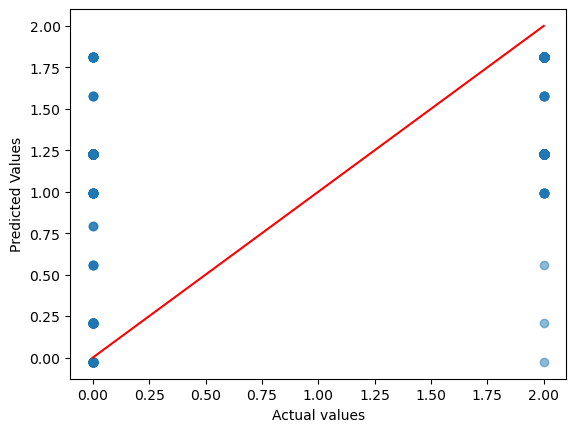

In [119]:
plt.scatter(y2_test, y2_pred, alpha=0.5)
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], color="red")
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.show()

In [120]:
print('''Linear Regression Model 2: Socio-Economic
The second linear regression model looks at all the socio-economic variables we found most correlated with student dropout status. It obtained an R-squared score of 0.25. This means that 25% of the change in student dropout status is explained by these variables.

Variables: Target, Debtor, Tuition fees up to date, scholarship holder
''')

Linear Regression Model 2: Socio-Economic
The second linear regression model looks at all the socio-economic variables we found most correlated with student dropout status. It obtained an R-squared score of 0.25. This means that 25% of the change in student dropout status is explained by these variables.

Variables: Target, Debtor, Tuition fees up to date, scholarship holder



In [121]:
# Linear Regression Model 3: Academic Performance

In [122]:
student_data_lr3 = academic_performance_df  #cleanstudent_subset

In [123]:
academic_performance_df#cleanstudent_subset

,Target,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,0,0,0.000000,0,0.000000
1,2,6,14.000000,6,13.666667
2,0,0,0.000000,0,0.000000
3,2,6,13.428571,5,12.400000
4,2,5,12.333333,6,13.000000
...,...,...,...,...,...
4419,2,5,13.600000,5,12.666667
4420,0,6,12.000000,2,11.000000
4421,0,7,14.912500,1,13.500000
4422,2,5,13.800000,5,12.000000


In [124]:
x3 = student_data_lr3.drop('Target', axis=1)
y3 = student_data_lr3['Target']

In [125]:
from sklearn.model_selection import train_test_split
#split the data into training and testing

X3_train, X3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.3)

In [126]:
x3.shape

(3630, 4)

In [127]:
y3.shape

(3630,)

In [128]:
print("Training Set Shape: " , X3_train.shape,y3_train.shape)
print("Testing Set Shape: " , X3_test.shape,y3_test.shape)

Training Set Shape:  (2541, 4) (2541,)
Testing Set Shape:  (1089, 4) (1089,)


In [129]:
lr3 =LinearRegression()

In [130]:
#Train the model on the training set

lr3.fit(X3_train,y3_train)

LinearRegression()

In [131]:
#predict on the testing set
#Y predicted value is the predicted target values based on the features(these are all the columns in the dataset.
#Once we have these preds we can compare them to the actual values of the target
y3_pred = lr3.predict(X3_test)

In [132]:
y3_pred.shape

(1089,)

In [133]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error,r2_score

#Evaluate the performance of the model
r2_3= r2_score(y3_test,y3_pred)

mse_3=mean_squared_error(y3_test, y3_pred)

mae_3=mean_absolute_error(y3_test, y3_pred)

intercept_3= lr3.intercept_

print("R2 score: ", r2_3) # variance of the dependent variable (target) is explained by the independent variables(features)
                        # How well the model fits the data. Higher the better
                        #If the model is a 
print("Mean Squared Error: ", mse_3)
print("Mean Absolute Error: ", mae_3)
print("Intercept: ", intercept_3)

R2 score:  0.4703251274024922
Mean Squared Error:  0.5006323743276796
Mean Absolute Error:  0.5424151773272973
Intercept:  0.1449212857290143


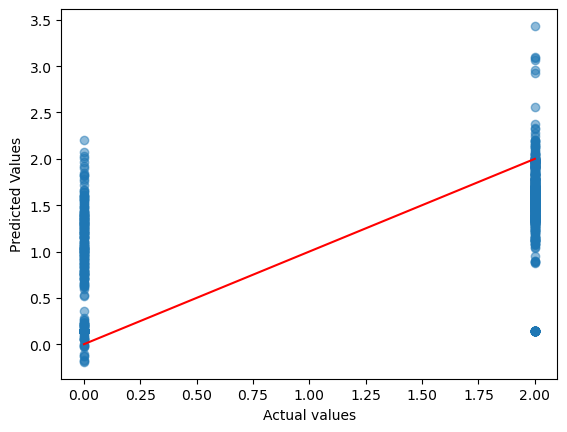

In [134]:
plt.scatter(y3_test, y3_pred, alpha=0.5)
plt.plot([y3.min(), y3.max()], [y3.min(), y3.max()], color="red")
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.show()

In [135]:
print('''Linear Regresion Model 3: Academic Performance
The third linear regression model looks at all the academic performance variables that are most correlated with student dropout status. An R-squared score of 0.45 was received. This means that 45% of the change in  student dropout status is explained by these variables.

Variables: Target,  curricular units first semester(approved), curricular units second semester(approved), curricular units first semester(grade), curricular units second semester(grade)
''')

Linear Regresion Model 3: Academic Performance
The third linear regression model looks at all the academic performance variables that are most correlated with student dropout status. An R-squared score of 0.45 was received. This means that 45% of the change in  student dropout status is explained by these variables.

Variables: Target,  curricular units first semester(approved), curricular units second semester(approved), curricular units first semester(grade), curricular units second semester(grade)



In [136]:
# Linear Regression Model 4: Demographic

In [137]:
student_data_lr4 = demographic_df  #cleanstudent_subset

In [138]:
demographic_df#cleanstudent_subset

,Target,Gender,Age at enrollment
0,0,1,20
1,2,1,19
2,0,1,19
3,2,0,20
4,2,0,45
...,...,...,...
4419,2,1,19
4420,0,0,18
4421,0,0,30
4422,2,0,20


In [139]:
x4 = student_data_lr4.drop('Target', axis=1)
y4 = student_data_lr4['Target']

In [140]:
from sklearn.model_selection import train_test_split
#split the data into training and testing

X4_train, X4_test, y4_train, y4_test = train_test_split(x4,y4, test_size=0.3)

In [141]:
x4.shape

(3630, 2)

In [142]:
y4.shape

(3630,)

In [143]:
print("Training Set Shape: " , X4_train.shape,y4_train.shape)
print("Testing Set Shape: " , X4_test.shape,y4_test.shape)

Training Set Shape:  (2541, 2) (2541,)
Testing Set Shape:  (1089, 2) (1089,)


In [144]:
lr4 =LinearRegression()

In [145]:
#Train the model on the training set

lr4.fit(X4_train,y4_train)

LinearRegression()

In [146]:
#predict on the testing set
#Y predicted value is the predicted target values based on the features(these are all the columns in the dataset.
#Once we have these preds we can compare them to the actual values of the target
y4_pred = lr4.predict(X4_test)

In [147]:
y4_pred.shape

(1089,)

In [148]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error,r2_score

#Evaluate the performance of the model
r2_4= r2_score(y4_test,y4_pred)

mse_4=mean_squared_error(y4_test, y4_pred)

mae_4=mean_absolute_error(y4_test, y4_pred)

intercept_4= lr4.intercept_

print("R2 score: ", r2_4) # variance of the dependent variable (target) is explained by the independent variables(features)
                        # How well the model fits the data. Higher the better
                        #If the model is a 
print("Mean Squared Error: ", mse_4)
print("Mean Absolute Error: ", mae_4)
print("Intercept: ", intercept_4)

R2 score:  0.09334976869367262
Mean Squared Error:  0.8419106337806481
Mean Absolute Error:  0.8436780078610246
Intercept:  2.0317485899856726


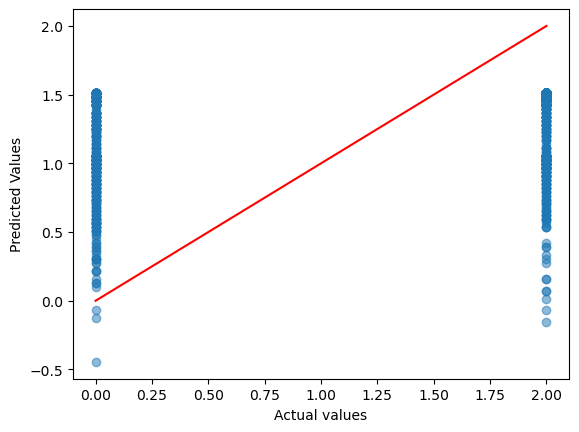

In [149]:
plt.scatter(y4_test, y4_pred, alpha=0.5)
plt.plot([y4.min(), y4.max()], [y4.min(), y4.max()], color="red")
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.show()

In [150]:
print('''Linear Regression Model 4: Demographic

The fourth linear regression model evaluates the demographic variables we found were most correlated with student dropout status. It received an R-squared score of 0.11. This means that 11% of the change in  student dropout status is explained by these variables.

Variables: Target, gender, age of enrollment''')


Linear Regression Model 4: Demographic

The fourth linear regression model evaluates the demographic variables we found were most correlated with student dropout status. It received an R-squared score of 0.11. This means that 11% of the change in  student dropout status is explained by these variables.

Variables: Target, gender, age of enrollment


In [151]:
print('''Inferential Statistics: Are there relationships between the target academic success or dropout with demographic, 
social-economics, academic performance or economic factors?

- Attributes that are categorized under Academic Performance are the most influential in a student’s dropout or graduation rate
- Intuitively a student’s grade may place them on probation or at higher risk of dropping out if they do not perform well.
- Socio-Economics play a minor role in a student’s success or dropout rate.  
- Students who are debt free and up to date on their tuition payments, will more than likely graduate. While students who have 
    financial troubles may drop out.
- Age at enrollment and gender have little significance towards a student’s dropout or success rate.
- Academic enrollment and economic factors do not contribute towards  student’s dropout or graduation rate. ''')

Inferential Statistics: Are there relationships between the target academic success or dropout with demographic, 
social-economics, academic performance or economic factors?

- Attributes that are categorized under Academic Performance are the most influential in a student’s dropout or graduation rate
- Intuitively a student’s grade may place them on probation or at higher risk of dropping out if they do not perform well.
- Socio-Economics play a minor role in a student’s success or dropout rate.  
- Students who are debt free and up to date on their tuition payments, will more than likely graduate. While students who have 
    financial troubles may drop out.
- Age at enrollment and gender have little significance towards a student’s dropout or success rate.
- Academic enrollment and economic factors do not contribute towards  student’s dropout or graduation rate. 


In [152]:
print(''' Prescriptive Analysis: How can this data help educational institutions in the future? 

- High drop out rates may suggest potential issues in the program
- Early intervention for students who are at a higher risk of dropping out can be supported with services like success 
    advisors, peer support groups, or financial aid advisors to boost program reputations and rankings
- Graduation rates influence prospective students and foster a positive reputation for the institution
- Student dropout rates may target specific demographic, socio-economic factors, or ethnic backgrounds.  By improving 
    retention rates this maintains diversity and inclusivity in academia''')

 Prescriptive Analysis: How can this data help educational institutions in the future? 

- High drop out rates may suggest potential issues in the program
- Early intervention for students who are at a higher risk of dropping out can be supported with services like success 
    advisors, peer support groups, or financial aid advisors to boost program reputations and rankings
- Graduation rates influence prospective students and foster a positive reputation for the institution
- Student dropout rates may target specific demographic, socio-economic factors, or ethnic backgrounds.  By improving 
    retention rates this maintains diversity and inclusivity in academia


In [153]:
print('''Conclusion:
It is important for an educational institution to understand and observe their student drop out and graduation rates as it 
influences a student’s success, quality of education, compliance and ranking of the institution.  With a better understanding 
of what factors influence a student to graduate or dropout, they can work towards more efficient strategies that improve and
expand their programs, finances and the communities they serve.''')

Conclusion:
It is important for an educational institution to understand and observe their student drop out and graduation rates as it 
influences a student’s success, quality of education, compliance and ranking of the institution.  With a better understanding 
of what factors influence a student to graduate or dropout, they can work towards more efficient strategies that improve and
expand their programs, finances and the communities they serve.
